In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv('test.csv')

In [79]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

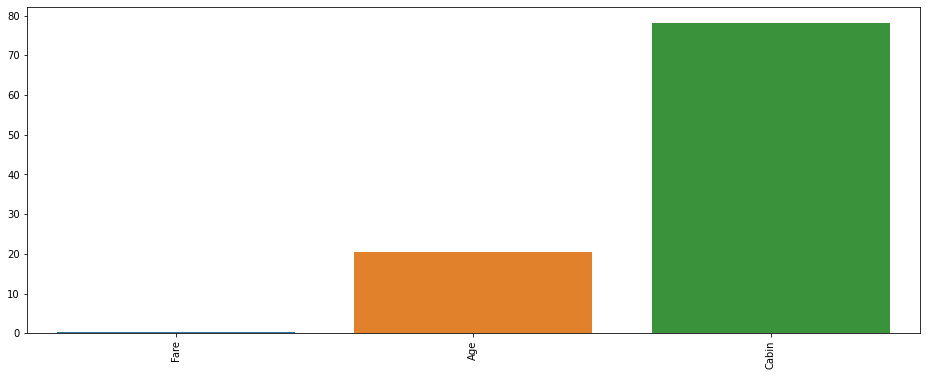

In [80]:
missing = percent_missing(df)
plt.figure(figsize = (16,6))
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90);

### Cabin 

In [81]:
df['Cabin']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 418, dtype: object

In [82]:
df['Cabin'] = df['Cabin'].fillna('None')

In [83]:
df['Cabin Class']= df['Cabin'].apply(lambda x:x[0])

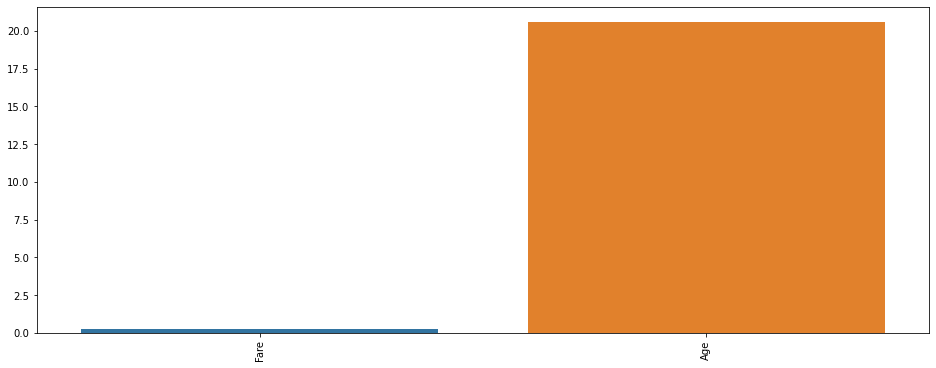

In [84]:
missing = percent_missing(df)
plt.figure(figsize = (16,6))
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90);

### Fare

In [86]:
df['Fare'] = df['Fare'].fillna(15)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  Cabin Class  418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


### Age

In [89]:
df['Second Name'] = df['Name'].apply(lambda x : (x.split('.')[0]).split(',')[1].strip())

In [90]:
df[df['Second Name'] == 'Ms']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Class,Second Name
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,None,Q,N,Ms


In [91]:
names = set(df['Second Name'])
age_nonnull = df[df['Age'].notnull()]
for name in names:
    nulls = df[(df['Second Name'] == name)].fillna(df[df['Second Name'] == name]['Age'].mean())
    age_nonnull = pd.concat([age_nonnull, nulls], axis =0)

In [92]:
df['Age'] = df['Age'].fillna(21.773973)

In [93]:
df.groupby('Second Name').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Second Name,,,,,,
Col,1058.500000,1.000000,50.000000,0.500000,0.000000,128.012500
Dona,1306.000000,1.000000,39.000000,0.000000,0.000000,108.900000
Dr,1185.000000,1.000000,53.000000,1.000000,1.000000,81.858300
Master,1123.380952,2.714286,10.143138,1.571429,1.380952,38.494043
Miss,1101.782051,2.435897,21.774687,0.551282,0.397436,40.087876
Mr,1101.279167,2.320833,29.571319,0.270833,0.175000,25.519288
Mrs,1090.097222,1.833333,36.524163,0.597222,0.833333,59.974249
Ms,980.000000,3.000000,21.773973,0.000000,0.000000,7.750000
Rev,1048.500000,2.000000,35.500000,0.500000,0.500000,19.500000


In [94]:
df = age_nonnull.drop_duplicates()

In [95]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Class,Second Name
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,None,Q,N,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,None,S,N,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,None,Q,N,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,None,S,N,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,None,S,N,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,1258,3,"Caram, Mr. Joseph",male,32.0,1,0,2689,14.4583,None,C,N,Mr
380,1272,3,"O'Connor, Mr. Patrick",male,32.0,0,0,366713,7.7500,None,Q,N,Mr
384,1276,2,"Wheeler, Mr. Edwin Frederick""""",male,32.0,0,0,SC/PARIS 2159,12.8750,None,S,N,Mr
413,1305,3,"Spector, Mr. Woolf",male,32.0,0,0,A.5. 3236,8.0500,None,S,N,Mr


In [98]:
df['Age'] = df['Age'].fillna(22)

<ipython-input-98-fb17af801f66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].fillna(22)


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 416
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  Cabin Class  418 non-null    object 
 12  Second Name  418 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 45.7+ KB


### Fare

In [16]:
df.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.454128,0.633028,37.659362,0.412844,0.353211,84.116571
2,445.956522,0.472826,29.911363,0.402174,0.380435,20.662183
3,439.154786,0.242363,26.268776,0.615071,0.393075,13.675550


### Embarked

In [17]:
df = df.drop([61,829], axis = 0)


In [101]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin Class', 'Second Name'],
      dtype='object')

In [105]:
df = df.sort_index()

In [107]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin Class', 'Second Name'],
      dtype='object')

### Dropping extra columns

In [108]:
df = df.drop(['Name', 'Cabin', 'Ticket', 'PassengerId'], axis = 1)

In [67]:
# df

### Adding some columns

In [109]:
df['Family Members'] = df['SibSp']+df['Parch']

### Final Data

In [111]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin Class,Second Name,Family Members
0,3,male,34.500000,0,0,7.8292,Q,N,Mr,0
1,3,female,47.000000,1,0,7.0000,S,N,Mrs,1
2,2,male,62.000000,0,0,9.6875,Q,N,Mr,0
3,3,male,27.000000,0,0,8.6625,S,N,Mr,0
4,3,female,22.000000,1,1,12.2875,S,N,Mrs,2
...,...,...,...,...,...,...,...,...,...,...
413,3,male,32.000000,0,0,8.0500,S,N,Mr,0
414,1,female,39.000000,0,0,108.9000,C,C,Dona,0
415,3,male,38.500000,0,0,7.2500,S,N,Mr,0
416,3,male,32.000000,0,0,8.0500,S,N,Mr,0


In [112]:
len(df.columns)

10

In [116]:
df.to_csv('test_final.csv', index = False)

### One hard encoding

In [113]:
X_str = df[['Sex', 'Second Name', 'Cabin Class', 'Embarked']]
X_int = df.drop(['Sex', 'Second Name', 'Cabin Class', 'Embarked'], axis = 1)

X_str_dummies = pd.get_dummies(data = X_str, drop_first=True)

df_combined = pd.concat([X_str_dummies,X_int], axis = 1)


In [114]:
list(df_combined.columns)

['Sex_male',
 'Second Name_Dona',
 'Second Name_Dr',
 'Second Name_Master',
 'Second Name_Miss',
 'Second Name_Mr',
 'Second Name_Mrs',
 'Second Name_Ms',
 'Second Name_Rev',
 'Cabin Class_B',
 'Cabin Class_C',
 'Cabin Class_D',
 'Cabin Class_E',
 'Cabin Class_F',
 'Cabin Class_G',
 'Cabin Class_N',
 'Embarked_Q',
 'Embarked_S',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Family Members']

In [115]:
len(df_combined.columns)

24

In [24]:
X = df_combined.drop('Survived', axis = 1)
y = df_combined['Survived']

### Data Spliting and regulating

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [27]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

In [28]:
X_test.shape

(267, 33)

In [29]:
penalty = ['l1']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0.8,1, 20)

In [30]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [31]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([ 6.30957344,  6.46437163,  6.62296762,  6.78545457,  6.95192796,
        7.12248558,  7.29722764,  7.4762568 ,  7.65967823,  7.8475997 ,
        8.04013161,  8.23738707,  8.43948197,  8.64653503,  8.8586679 ,
        9.07600522,  9.29867465,  9.52680703,  9.76053637, 10.        ]),
                         'penalty': ['l1']})

In [37]:
grid_model.best_params_

{'C': 6.309573444801933, 'penalty': 'l1'}

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [39]:
y_pred = grid_model.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred)

0.8576779026217228

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       163
           1       0.88      0.74      0.80       104

    accuracy                           0.86       267
   macro avg       0.86      0.84      0.85       267
weighted avg       0.86      0.86      0.86       267



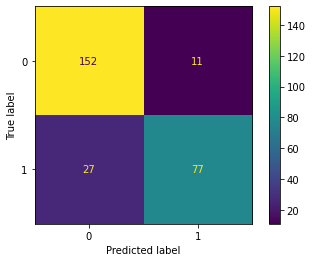

In [42]:
# Scaled so highest value=1
plot_confusion_matrix(grid_model,X_test,y_test)

# Final

In [32]:
df = pd.read_csv('test_final.csv')

In [35]:
df = df.drop('Unnamed: 0', axis = 1)

In [36]:
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin Class,Second Name,Family Members
0,892,3,male,34.500000,0,0,7.8292,Q,N,Mr,0
1,893,3,female,47.000000,1,0,7.0000,S,N,Mrs,1
2,894,2,male,62.000000,0,0,9.6875,Q,N,Mr,0
3,895,3,male,27.000000,0,0,8.6625,S,N,Mr,0
4,896,3,female,22.000000,1,1,12.2875,S,N,Mrs,2
...,...,...,...,...,...,...,...,...,...,...,...
414,1305,3,male,32.000000,0,0,8.0500,S,N,Mr,0
415,1306,1,female,39.000000,0,0,108.9000,C,C,Dona,0
416,1307,3,male,38.500000,0,0,7.2500,S,N,Mr,0
417,1308,3,male,32.000000,0,0,8.0500,S,N,Mr,0
